In [ ]:
%pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.12.0


#Data Pre-Processing

In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Normal': 0, 'Doubtful': 1, 'Moderate': 2, 'Mild': 3, 'Severe': 4}
['Normal', 'Doubtful', 'Moderate', 'Mild', 'Severe']
[0, 1, 2, 3, 4]


In [ ]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

#Rescale and Assign Categorical Label

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [ ]:
new_label.shape

(3651, 5)

In [ ]:
data.shape

(3651, 256, 256, 1)

In [ ]:
data.shape[1:]

(256, 256, 1)

#CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

#Splitting Data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

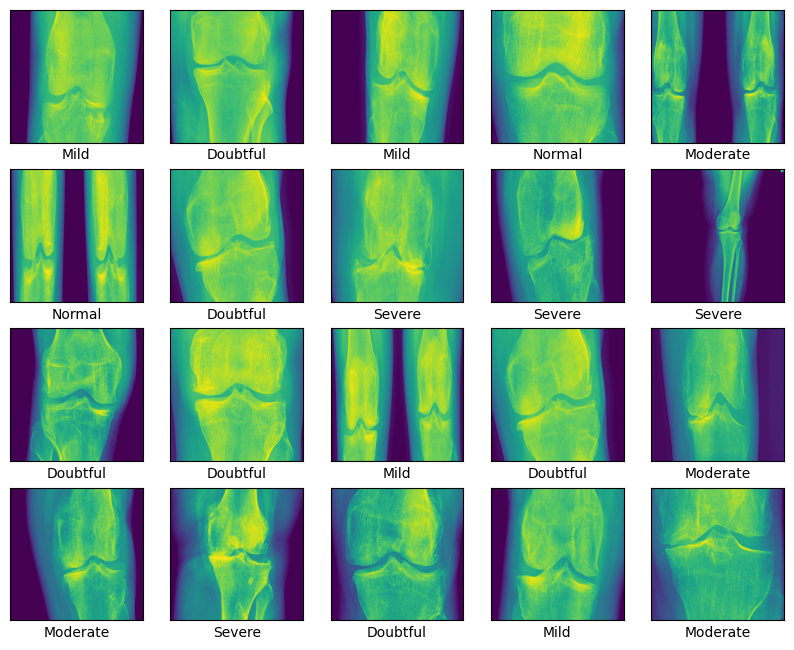

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

#Training the Model

In [ ]:
history=model.fit(x_train,y_train, epochs=100,validation_split=0.2)

Epoch 1/100
83/83 [==============================] - 27s 146ms/step - loss: 1.4824 - accuracy: 0.3581 - val_loss: 1.4309 - val_accuracy: 0.3820
Epoch 2/100
83/83 [==============================] - 10s 120ms/step - loss: 1.3930 - accuracy: 0.3866 - val_loss: 1.3749 - val_accuracy: 0.4064
Epoch 3/100
83/83 [==============================] - 10s 120ms/step - loss: 1.3376 - accuracy: 0.4159 - val_loss: 1.3513 - val_accuracy: 0.4140
Epoch 4/100
83/83 [==============================] - 10s 119ms/step - loss: 1.2799 - accuracy: 0.4498 - val_loss: 1.3063 - val_accuracy: 0.4247
Epoch 5/100
83/83 [==============================] - 10s 121ms/step - loss: 1.2122 - accuracy: 0.4833 - val_loss: 1.2315 - val_accuracy: 0.4764
Epoch 6/100
83/83 [==============================] - 10s 121ms/step - loss: 1.0576 - accuracy: 0.5662 - val_loss: 1.1744 - val_accuracy: 0.5068
Epoch 7/100
83/83 [==============================] - 10s 124ms/step - loss: 0.9910 - accuracy: 0.5970 - val_loss: 1.1344 - val_accuracy:

In [ ]:
model.save('model.h5')


In [ ]:
from matplotlib import pyplot as plt

#Plot the Training Loss and Accuracy

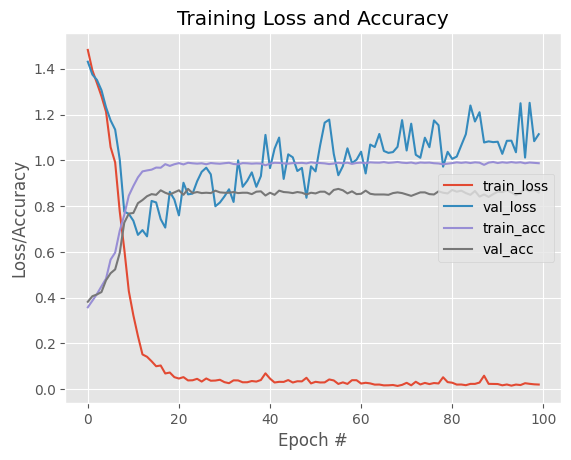

In [ ]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

#Testing the Model

In [ ]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 1.154152512550354 %
test accuracy: 0.8524590134620667 %


1/1 [==============================] - 0s 207ms/step
A.I predicts: Normal
Correct prediction for label 0 is Normal


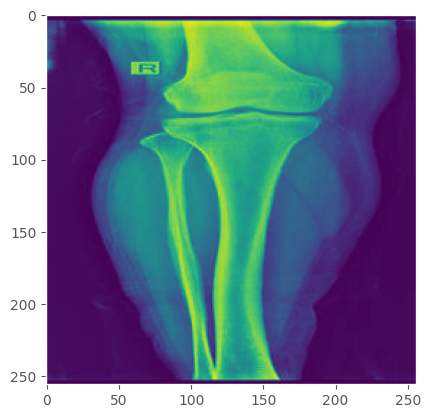

In [ ]:
X = 51

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

12/12 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

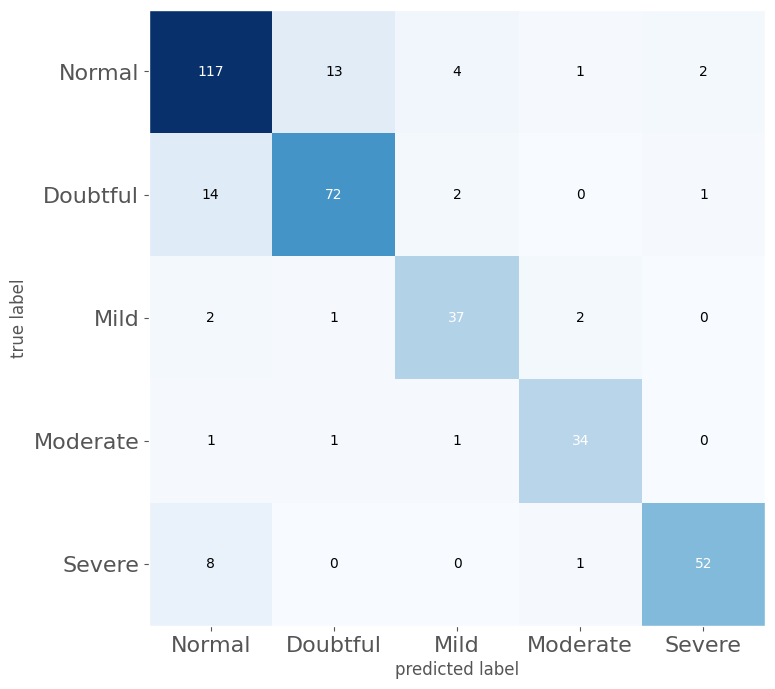

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mild','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mild','Moderate','Severe'], fontsize=16)
plt.show()

#Testing the Model, By giving Different Images

In [ ]:
from PIL import Image

img_path = '/content/drive/MyDrive/DATASET/Doubtful/DoubtfulG1 (1).png'
img = Image.open(img_path).convert('L')  # convert to grayscale
img = img.resize((img_size, img_size))
img = np.array(img) / 255.0  # normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)

1/1 [==============================] - 0s 69ms/step
Doubtful


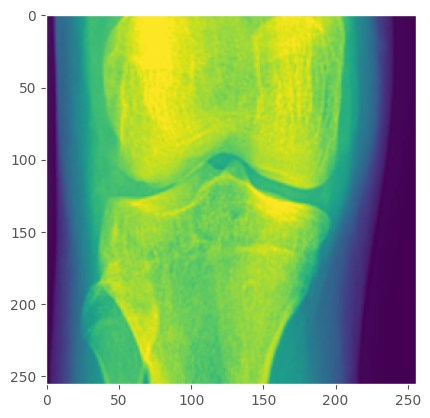

In [ ]:
predictions_single = model.predict(img)
print(categories[np.argmax(predictions_single)])
plt.imshow(np.squeeze(img))
plt.grid(False)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

12/12 [==============================] - 0s 34ms/step - loss: 1.1542 - accuracy: 0.8525
Test loss: 1.154152512550354
Test accuracy: 0.8524590134620667


In [ ]:

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print('Test accuracy:', accuracy)

12/12 [==============================] - 0s 32ms/step
Test accuracy: 0.8524590163934426
